In [1]:
#import packages
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('SMSSpamCollection',sep= "\t",names=['label' , 'message'])
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [5]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df['label'] = df['label'].map({'ham' :0, 'spam' :1})

In [7]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

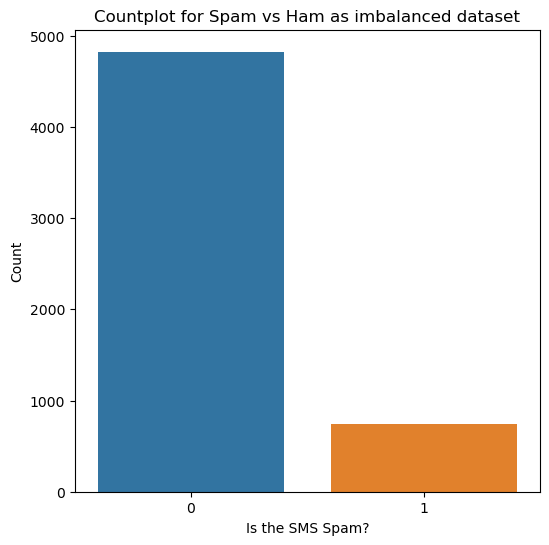

In [10]:
# Set the figure size
plt.figure(figsize=(6, 6))
# Create a countplot of the "label" column
p = sns.countplot(x="label", data=df)
# Add a title to the plot
p = plt.title("Countplot for Spam vs Ham as imbalanced dataset")
# Add labels to the x and y axes
p = plt.xlabel("Is the SMS Spam?")
p = plt.ylabel("Count")
# Show the plot
plt.show()

In [11]:
only_spam = df[df['label']==1]
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
df.shape

(5572, 2)

In [13]:
count = int((df.shape[0]- only_spam.shape[0]) / only_spam.shape[0])

In [14]:
count

6

In [15]:
for i in range( 0, count-1):
    df = pd.concat([df, only_spam])

In [16]:
df.shape

(9307, 2)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

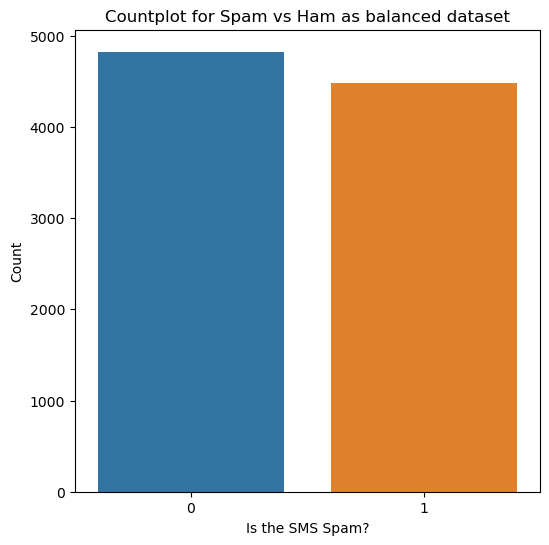

In [18]:
# Set the figure size
plt.figure(figsize=(6, 6))
# Create a countplot of the "label" column
p = sns.countplot(x="label", data=df)
# Add a title to the plot
p = plt.title("Countplot for Spam vs Ham as balanced dataset")
# Add labels to the x and y axes
p = plt.xlabel("Is the SMS Spam?")
p = plt.ylabel("Count")
# Show the plot
plt.show()

In [19]:
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


C:\Users\Rajesh\AppData\Local\Temp\ipykernel_7240\2924121147.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["label"] == 0].word_count, ax=axes[0], kde=True, label="Ham")
C:\Users\Rajesh\AppData\Local\Temp\ipykernel_7240\2924121147.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df

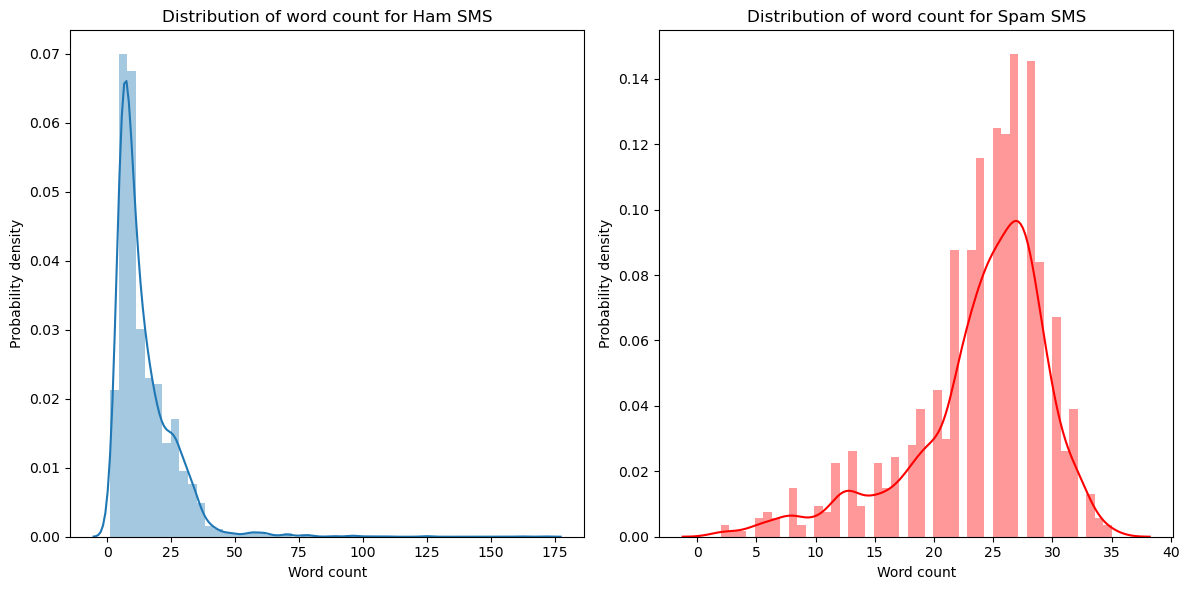

In [20]:


#(1,1)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.distplot(df[df["label"] == 0].word_count, ax=axes[0], kde=True, label="Ham")
sns.distplot(df[df["label"] == 1]["word_count"], ax=axes[1], color="red", kde=True, label="Spam")

# Add labels to the x and y axes
axes[0].set_xlabel("Word count")
axes[0].set_ylabel("Probability density")
axes[1].set_xlabel("Word count")
axes[1].set_ylabel("Probability density")

# Add a title to each plot
axes[0].set_title("Distribution of word count for Ham SMS")
axes[1].set_title("Distribution of word count for Spam SMS")

# Adjust the layout of the plots
plt.tight_layout()

# Show the plots
plt.show()


In [21]:
def currency(data):
    currency_symbols = ['€','¢','£','¥','₹','₱','$']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [22]:
df["contains_currency_symbol"]= df["message"].apply(currency)

In [23]:
df

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


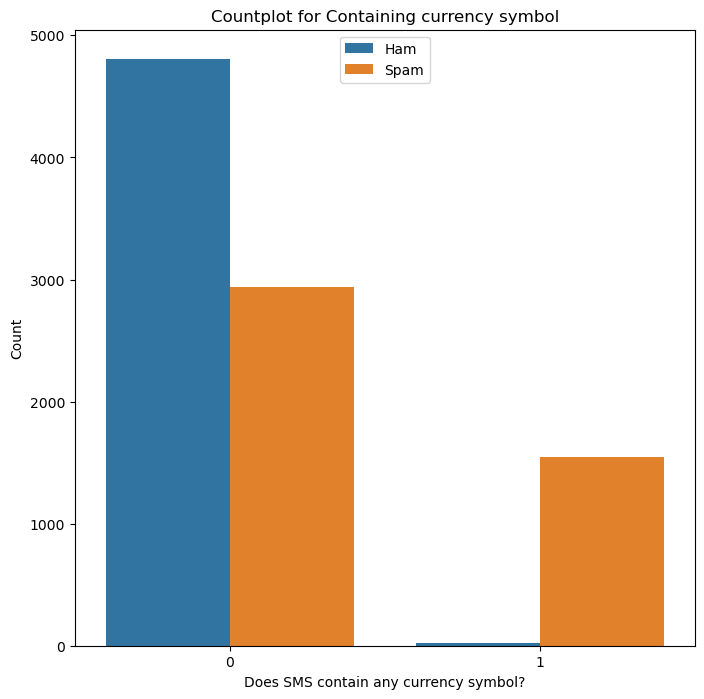

In [24]:
plt.figure(figsize=(8, 8))
p = sns.countplot(x="contains_currency_symbol", data=df, hue="label")
plt.title('Countplot for Containing currency symbol')
plt.xlabel('Does SMS contain any currency symbol?')
plt.ylabel('Count')
plt.legend(labels=["Ham", "Spam"], loc=9)
plt.show()

In [25]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rajesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rajesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
corpus = []
wnl = WordNetLemmatizer()
for sms in list(df.message):
  message = re.sub(pattern="[^a-zA-Z]", repl=" ", string=sms) # Flitering out special characters and numbers
  message = message.lower()
  words = message.split() # Tokenizer
  filtered_words = [word for word in words if word not in set(stopwords.words("english"))]
  lemm_words = [wnl.lemmatize(word) for word in filtered_words]
  message = ' '.join(lemm_words)
  corpus.append(message)

In [27]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [29]:
X = pd.DataFrame(vectors, columns = feature_names)
y=df['label']

In [30]:
X

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.4117,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
9303,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.326017,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.287064,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [31]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: label, Length: 9307, dtype: int64

In [34]:
# splitting the data into train and test sets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

In [36]:
X_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
3533,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.343368,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))

0.943
0.004


In [38]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [40]:
y_test

1155    0
1790    0
3003    0
1122    1
592     1
       ..
4147    0
274     0
1345    0
2367    1
4031    0
Name: label, Length: 1862, dtype: int64

In [41]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [42]:
cm = confusion_matrix(y_test , y_pred)
cm

array([[905,  54],
       [ 56, 847]], dtype=int64)

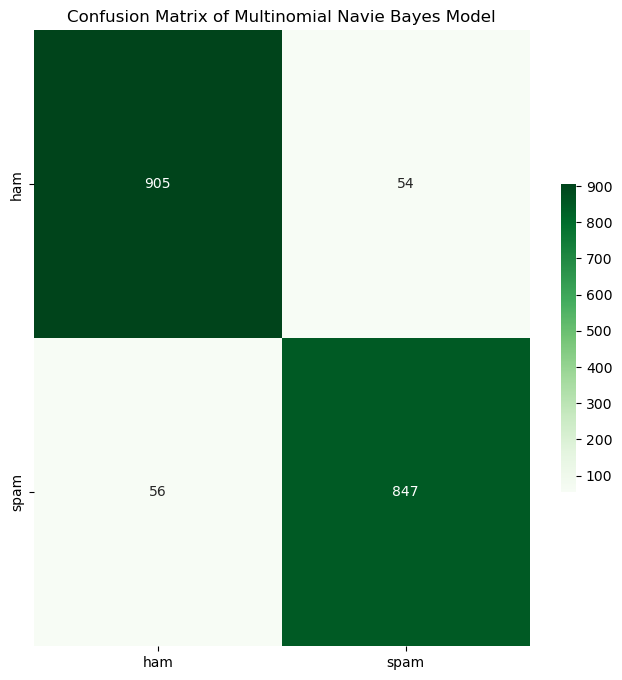

In [43]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5},cmap="Greens")
p = plt.title("Confusion Matrix of Multinomial Navie Bayes Model")

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, X, y, scoring='f1', cv=10)
print(round(cv1.mean(), 3))
print(round(cv1.std(), 3))

0.98
0.003


In [45]:
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)

In [46]:
print(classification_report(y_test , y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.99      0.98      1862
weighted avg       0.99      0.98      0.98      1862



In [47]:
cm = confusion_matrix(y_test , y_pred1)
cm

array([[935,  24],
       [  4, 899]], dtype=int64)

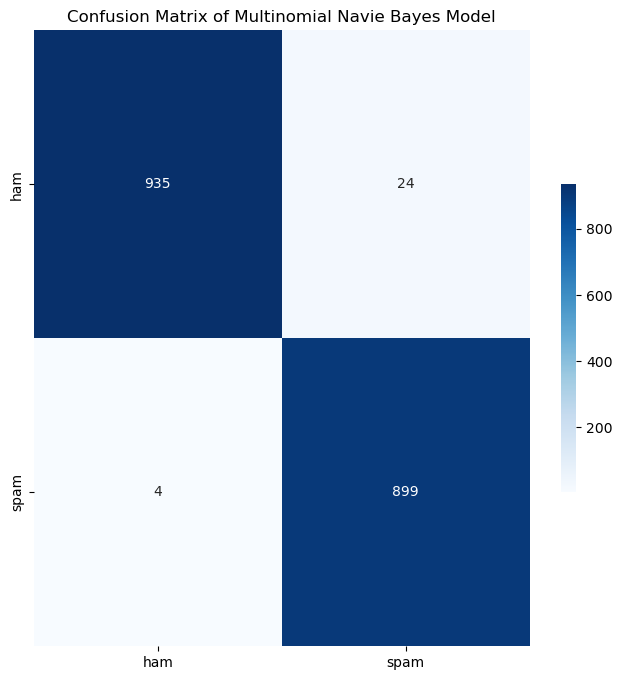

In [48]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot=True, fmt='g', cbar_kws={"shrink": 0.5},cmap="Blues")
p = plt.title("Confusion Matrix of Multinomial Navie Bayes Model")

In [49]:
# Accuracy Score of our model
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred1))

Accuracy: 0.9849624060150376


In [50]:
def predict_spam(sms):
  message = re.sub(pattern="[^a-zA-Z]", repl=" ", string=sms) # Flitering out special characters and numbers
  message = message.lower()
  words = message.split() # Tokenizer
  filtered_words = [word for word in words if word not in set(stopwords.words("english"))]
  lemm_words = [wnl.lemmatize(word) for word in filtered_words]

  message = ' '.join(lemm_words)
  temp = tfidf.transform([message]).toarray()
  return dt.predict(temp)

In [51]:
#prediction 2-  text message
sample1 = 'IMPORTANT You could be entitled up to £3,168 in compensation from mis-sold PPI on a credit card or loan.'
if predict_spam(sample1):
    print('hey!,this is a SPAM message.')
else:
    print('hey!,this is a ham(normal) message')

hey!,this is a ham(normal) message


C:\Anakonda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [52]:
#prediction 2-  text message
sample2 = 'FreeMsg Hey there darling its been 3 weeks now and no word back! Id like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv'
if predict_spam(sample2):
    print('hey!,this is a SPAM message.')
else:
    print('hey!,this is a ham(normal) message')

hey!,this is a SPAM message.


C:\Anakonda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [55]:
#prediction 2-  text message
sample2 = 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589'
if predict_spam(sample2):
    print('hey!,this is a SPAM message.')
else:
    print('hey!,this is a ham(normal) message')

hey!,this is a SPAM message.


C:\Anakonda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
